### Feature selection

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv('..\data\salary.train.processed.csv')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')

In [3]:
import pandas as pd

# Example: assuming data_train is your processed dataset
X = data_train.drop(columns=['label'])
y = data_train['label']

- Compute correlation with the target

In [4]:

corr_with_label = X.corrwith(y).abs().sort_values(ascending=False)

print("Top correlated features with label:")
print(corr_with_label.head(10))

Top correlated features with label:
marital-status_married-civ-spouse    0.509334
relationship_husband                 0.450938
marital-status_never-married         0.385850
education-num                        0.373260
capitalgain                          0.310260
age-group                            0.293202
relationship_own-child               0.286117
hoursperweek                         0.276753
sex_male                             0.254890
sex_female                           0.254890
dtype: float64


In [5]:
threshold = 0.1
selected_features = corr_with_label[corr_with_label >= threshold].index.tolist()

In [6]:
X_selected = X[selected_features]
print(f"Selected {len(selected_features)} features based on correlation >= {threshold}")

Selected 24 features based on correlation >= 0.1


In [7]:
corr_matrix = X_selected.corr().abs()

# Create upper triangle mask
upper = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))

# Drop features with high inter-correlation
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

X_final = X_selected.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} redundant features.")

Dropped 1 redundant features.


In [8]:
print(to_drop)

['sex_female']


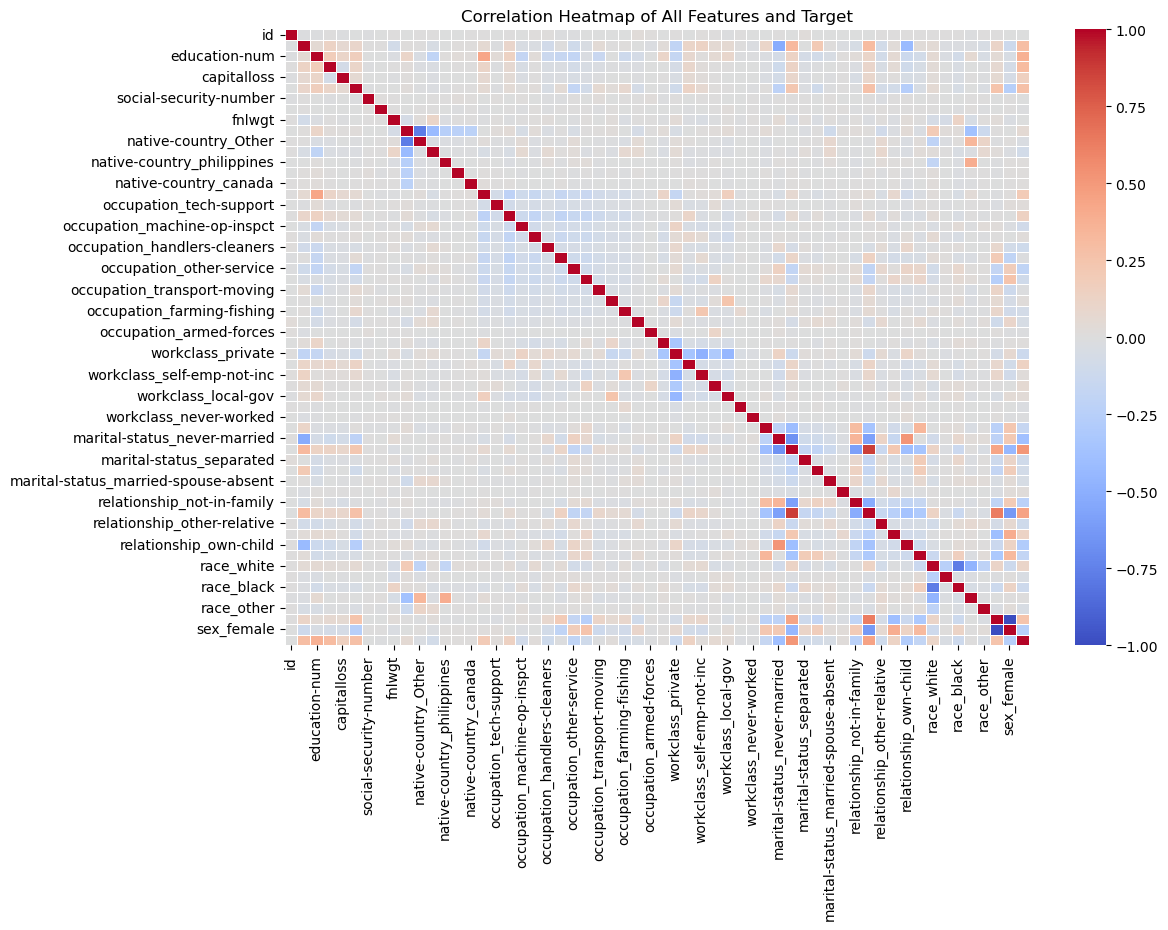

In [9]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# คำนวณ correlation matrix (เฉพาะ numeric features)
corr_matrix = data_train.corr(numeric_only=True)

# สร้าง heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=False,  # ไม่แสดงตัวเลขบน heatmap
    cmap='coolwarm',
    center=0,
    linewidths=0.5,  # ความหนาของเส้นแบ่ง
    linecolor='white'  # สีของเส้นแบ่ง
)
plt.title("Correlation Heatmap of All Features and Target")
plt.show()

In [10]:
print(selected_features)

['marital-status_married-civ-spouse', 'relationship_husband', 'marital-status_never-married', 'education-num', 'capitalgain', 'age-group', 'relationship_own-child', 'hoursperweek', 'sex_male', 'sex_female', 'relationship_not-in-family', 'occupation_prof-specialty', 'occupation_other-service', 'relationship_unmarried', 'marital-status_divorced', 'capitalloss', 'occupation_exec-managerial', 'workclass_self-emp-inc', 'relationship_wife', 'workclass_private', 'race_black', 'race_white', 'relationship_other-relative', 'occupation_handlers-cleaners']


In [11]:
data_train

,id,age-group,education-num,capitalgain,capitalloss,hoursperweek,social-security-number,house-number,fnlwgt,native-country_united-states,...,relationship_own-child,relationship_unmarried,race_white,race_amer-indian-eskimo,race_black,race_asian-pac-islander,race_other,sex_male,sex_female,label
0,26890,3.0,16.0,0.0,0.0,3.0,1.672646,0.010780,1.326909,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,933,3.0,14.0,4.0,0.0,3.0,1.276105,0.487078,-0.863204,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,25596,2.0,10.0,0.0,0.0,2.0,-0.596153,1.417561,2.005484,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,12949,2.0,13.0,0.0,0.0,3.0,0.106478,-1.622392,4.735296,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6681,1.0,9.0,0.0,0.0,2.0,1.090917,-1.139074,0.453120,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16715,8695,0.0,10.0,0.0,0.0,2.0,-1.425545,-1.640643,-1.410660,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16716,2192,2.0,10.0,2.0,0.0,2.0,0.938057,-1.433908,-0.824585,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16717,8250,0.0,9.0,0.0,0.0,2.0,0.269947,1.282429,1.214576,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
16718,18511,2.0,14.0,0.0,0.0,0.0,-0.823025,0.071151,2.806192,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### training Randomforest

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [13]:
data_train = pd.read_csv('..\data\salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [14]:
data_train

,marital-status_married-civ-spouse,relationship_husband,marital-status_never-married,education-num,capitalgain,age-group,relationship_own-child,hoursperweek,sex_male,relationship_not-in-family,...,capitalloss,occupation_exec-managerial,workclass_self-emp-inc,relationship_wife,workclass_private,race_black,race_white,relationship_other-relative,occupation_handlers-cleaners,label
id,,,,,,,,,,,,,,,,,,,,,
26890,0.0,0.0,0.0,16.0,0.0,3.0,1.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
933,0.0,0.0,0.0,14.0,4.0,3.0,0.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
25596,0.0,0.0,1.0,10.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
12949,0.0,0.0,0.0,13.0,0.0,2.0,0.0,3.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6681,1.0,1.0,0.0,9.0,0.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,0.0,1.0,10.0,0.0,0.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2192,1.0,1.0,0.0,10.0,2.0,2.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8250,0.0,0.0,1.0,9.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [15]:
# กำหนด target
target = 'label'

# แยกข้อมูลฝึกและทดสอบ
X_train = data_train.drop(columns=[target])
y_train = data_train[target]
X_test = data_test.drop(columns=[target])
y_test = data_test[target]

# สร้างและฝึกโมเดล Random Forest เริ่มต้น
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("\nF1 Score จาก Random Forest เริ่มต้น:", f1)


F1 Score จาก Random Forest เริ่มต้น: 0.8078931629312516


In [17]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [20]:
import pandas
import optuna
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np

# --- 1. โหลดและเตรียมข้อมูล (เหมือนเดิม) ---
# (ใช้ไฟล์ salary.train.processed.csv เหมือนเดิม)
data_train_full = data_train
   
X_full = data_train_full.drop(['label'], axis='columns')
y_full = data_train_full['label']

# หมายเหตุ: Optuna ทำงานได้ดีที่สุดเมื่อใช้ cross-validation
# เราไม่จำเป็นต้องแบ่ง X_train/X_val เหมือนตอนทำ early stopping กับ XGBoost
# เราจะใช้ X_full, y_full ไปเลย
print(f"ใช้ข้อมูลเทรนทั้งหมด {len(y_full)} records สำหรับการจูนด้วย Optuna (K-Fold CV)")

# คำนวณ class_weight สำหรับ RF (RF ใช้ 'class_weight' แทน 'scale_pos_weight')
# 'balanced' เป็นวิธีที่ง่ายและมักจะได้ผลดี
rf_class_weight = 'balanced' 


# --- 2. สร้างฟังก์ชัน Objective (หัวใจของ Optuna) ---

def objective(trial):
    """
    ฟังก์ชันนี้จะถูกเรียกโดย Optuna ในแต่ละ "trial" (การทดลอง)
    trial: คือ object ที่ใช้ในการ "เสนอ" ค่าพารามิเตอร์
    """
    
    # กำหนดช่วงของพารามิเตอร์ที่เราอยากให้ Optuna ไป "สุ่มหา"
    param_rf = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0) # สุ่มเป็น %
    }
    
    # สร้างโมเดล RF ด้วยพารามิเตอร์ที่ Optuna สุ่มมาให้
    model_rf = RandomForestClassifier(
        **param_rf,
        class_weight=rf_class_weight, # จัดการ imbalance
        random_state=42,
        n_jobs=-1
    )
    
    # ประเมินผลโมเดลด้วย Cross-validation (cv=3 คือ 3-Fold)
    # เราจะใช้ 'f1_weighted' เพราะข้อมูลเรา imbalance
    score = cross_val_score(
        model_rf, 
        X_full, 
        y_full, 
        cv=3,                 # 3-Fold Cross-validation
        scoring='f1_weighted',
        n_jobs=-1
    )
    
    # คืนค่า F1 เฉลี่ยกลับไปให้ Optuna
    f1_avg = np.mean(score)
    return f1_avg

# --- 3. เริ่มการค้นหา (Study) ---

print("\nกำลังเริ่มการค้นหาพารามิเตอร์ด้วย Optuna...")

# สร้าง study object, บอกว่าเราต้องการ 'maximize' (หาค่า F1 สูงสุด)
pruner = optuna.pruners.MedianPruner()
study = optuna.create_study(direction='maximize', pruner=pruner)

# สั่งให้เริ่มค้นหา (optimize) โดยเรียก objective 50 ครั้ง
study.optimize(
    objective, 
    n_trials=50,  # จำนวนครั้งที่จะให้ลอง (ยิ่งเยอะยิ่งดี แต่ยิ่งนาน)
    show_progress_bar=True # แสดงแถบความคืบหน้า
)

# --- 4. แสดงผลลัพธ์ ---

print("\n--- Optuna ค้นหาเสร็จสิ้น! ---")

# พารามิเตอร์ที่ดีที่สุดที่หาได้
print("พารามิเตอร์ที่ดีที่สุด (Best Parameters):")
print(study.best_params)

# F1-score ที่ดีที่สุดที่ทำได้ (จากการ cross-validation)
print(f"\nF1-Weighted ที่ดีที่สุด (จากการ CV): {study.best_value:.6f}")


# --- 5. (ขั้นตอนต่อไป) เทรนโมเดลสุดท้ายและประเมินผลบน Test Set ---

print("\nกำลังเทรนโมเดล RF สุดท้ายด้วยพารามิเตอร์ที่ดีที่สุด...")

# ดึงพารามิเตอร์ที่ดีที่สุดมา
best_parameter = study.best_params  # 👈 *** เปลี่ยนชื่อตัวแปรตรงนี้ ***

# สร้างโมเดลสุดท้าย
rf_model_final = RandomForestClassifier(
    **best_parameter,             # 👈 *** และเปลี่ยนตรงนี้ ***
    class_weight=rf_class_weight,
    random_state=42,
    n_jobs=-1
)

# เทรนโมเดลด้วยข้อมูล "ทั้งหมด" (X_full, y_full)
rf_model_final.fit(X_full, y_full)

print("เทรนโมเดลสุดท้ายเสร็จสิ้น! กำลังประเมินผลบน Test Set...")

# โหลดข้อมูล Test (เหมือนโค้ด XGBoost ของคุณ)
data_test_rf = data_test
data_test_rf['prediction'] = rf_model_final.predict(data_test_rf.drop(['label'], axis='columns'))

# แสดงผลลัพธ์บน Test Set
print("\nRandom Forest (Optuna-Tuned) Confusion Matrix:")
print(sklearn.metrics.confusion_matrix(
    y_true=data_test_rf['label'],
    y_pred=data_test_rf['prediction']
))

report_scores_rf = sklearn.metrics.classification_report(
    y_true=data_test_rf['label'],
    y_pred=data_test_rf['prediction'],
    digits=6,
    output_dict=True
)
df_score_rf = pandas.DataFrame(report_scores_rf).transpose()
print("\nRandom Forest (Optuna-Tuned) Report:")
print(df_score_rf)

[I 2025-10-22 15:36:15,091] A new study created in memory with name: no-name-9b08e9a2-42b5-4344-9870-8aa72704abc4


ใช้ข้อมูลเทรนทั้งหมด 16720 records สำหรับการจูนด้วย Optuna (K-Fold CV)

กำลังเริ่มการค้นหาพารามิเตอร์ด้วย Optuna...


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-10-22 15:36:32,093] Trial 0 finished with value: 0.8073131237855068 and parameters: {'n_estimators': 950, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 12, 'criterion': 'entropy', 'max_features': 0.4772928780321031}. Best is trial 0 with value: 0.8073131237855068.
[I 2025-10-22 15:36:39,018] Trial 1 finished with value: 0.811041490630163 and parameters: {'n_estimators': 250, 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 0.5231793713781252}. Best is trial 1 with value: 0.811041490630163.
[I 2025-10-22 15:36:44,148] Trial 2 finished with value: 0.7824672748094931 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 0.4723981035731466}. Best is trial 1 with value: 0.811041490630163.
[I 2025-10-22 15:36:49,107] Trial 3 finished with value: 0.8125870636696034 and parameters: {'n_estimators': 500, 'max_depth': 11, 'min_samples_

In [21]:
print(best_parameter)

{'n_estimators': 300, 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 9, 'criterion': 'entropy', 'max_features': 0.42082357754585725}


In [23]:
data_train = pd.read_csv('..\data\salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [24]:
import pandas
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import classification_report

# --- 1. Load Data (Needed for training) ---

data_train_full = data_train

X_full = data_train_full.drop(['label'], axis='columns')
y_full = data_train_full['label']

# --- 2. Define Your Best Parameters ---
# These are the params you provided from Optuna
best_rf_params = best_parameter
# --- 3. Create and Train the Final Model ---
print("\nTraining final RF model with best params and class weighting...")

rf_model_final = RandomForestClassifier(
    **best_rf_params,
    class_weight='balanced_subsample', # 👈 Here is the class weight
    random_state=42,
    n_jobs=-1
)

# Train the model on the full training dataset
rf_model_final.fit(X_full, y_full)
print("Model training complete.")

# --- 4. Evaluate on Test Data ---
print("\nEvaluating model on test data...")

data_test_rf = data_test
data_test_rf['prediction'] = rf_model_final.predict(data_test_rf.drop(['label'], axis='columns'))

# Print the report
report_scores_rf = sklearn.metrics.classification_report(
    y_true=data_test_rf['label'],
    y_pred=data_test_rf['prediction'],
    digits=6,
    output_dict=True
)
df_score_rf = pandas.DataFrame(report_scores_rf).transpose()

print("\nRandom Forest (Tuned + Weighted) Report:")
print(df_score_rf)


Training final RF model with best params and class weighting...
Model training complete.

Evaluating model on test data...

Random Forest (Tuned + Weighted) Report:
              precision    recall  f1-score      support
0.0            0.889358  0.785182  0.834029  2416.000000
1.0            0.746458  0.866213  0.801889  1764.000000
accuracy       0.819378  0.819378  0.819378     0.819378
macro avg      0.817908  0.825698  0.817959  4180.000000
weighted avg   0.829053  0.819378  0.820466  4180.000000


In [25]:
data_train = pd.read_csv('..\data\salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [29]:
import pandas
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE  # 👈 1. Import SMOTE

# --- 1. Load Data (Needed for training) ---
data_train_full = data_train


X_full = data_train_full.drop(['label'], axis='columns')
y_full = data_train_full['label']

print(f"Original training data shape: {X_full.shape}")
print(f"Original label distribution:\n{y_full.value_counts()}")

# --- 2. Define Your Best Parameters ---
# These are the params you provided from Optuna
best_rf_params = best_parameter

# --- 3. Apply SMOTE to the Training Data ---
print("\nApplying SMOTE to the training data...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_full, y_full)

print(f"New resampled training data shape: {X_resampled.shape}")
print(f"New resampled label distribution:\n{y_resampled.value_counts()}")


# --- 4. Create and Train the Final Model (with NO class_weight) ---
print("\nTraining final RF model on SMOTEd data...")

rf_model_final = RandomForestClassifier(
    **best_rf_params,
    # class_weight='balanced_subsample', # 👈 2. REMOVE class_weight
    random_state=42,
    n_jobs=-1
)

# 4. Train the model on the NEW resampled data
rf_model_final.fit(X_resampled, y_resampled)
print("Model training complete.")

# --- 5. Evaluate on ORIGINAL Test Data ---
print("\nEvaluating model on *original* test data...")

data_test_rf = data_test

# IMPORTANT: Do NOT apply SMOTE to the test data.
X_test = data_test_rf.drop(['label'], axis='columns')
y_test = data_test_rf['label']

data_test_rf['prediction'] = rf_model_final.predict(X_test)

# Print the report
report_scores_rf = sklearn.metrics.classification_report(
    y_true=y_test,
    y_pred=data_test_rf['prediction'],
    digits=6,
    output_dict=True
)
df_score_rf = pandas.DataFrame(report_scores_rf).transpose()

print("\nRandom Forest (Tuned + SMOTE) Report:")
print(df_score_rf)

Original training data shape: (16720, 23)
Original label distribution:
label
0.0    9719
1.0    7001
Name: count, dtype: int64

Applying SMOTE to the training data...


c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

New resampled training data shape: (19438, 23)
New resampled label distribution:
label
1.0    9719
0.0    9719
Name: count, dtype: int64

Training final RF model on SMOTEd data...
Model training complete.

Evaluating model on *original* test data...

Random Forest (Tuned + SMOTE) Report:
              precision    recall  f1-score      support
0.0            0.887656  0.794702  0.838611  2416.000000
1.0            0.754090  0.862245  0.804549  1764.000000
accuracy       0.823206  0.823206  0.823206     0.823206
macro avg      0.820873  0.828473  0.821580  4180.000000
weighted avg   0.831290  0.823206  0.824237  4180.000000


In [31]:
data_train = pd.read_csv('..\data\salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [32]:
import json
import joblib
import pandas
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek

# --- 1. Load Data (Needed for training) ---
data_train_full = data_test
 

X_full = data_train_full.drop(['label'], axis='columns')
y_full = data_train_full['label']  # 👈 *** THIS IS THE FIX ***

print(f"Original training data shape: {X_full.shape}")
print(f"Original label distribution:\n{y_full.value_counts()}")

# --- 2. Define Your Best Parameters ---
# These are the params you provided from Optuna
best_rf_params = best_parameter

# --- 3. Apply SMOTETomek to the Training Data ---
print("\nApplying SMOTETomek to the training data...")
# Note: SMOTETomek can take a bit longer than plain SMOTE
smt = SMOTETomek(random_state=42, n_jobs=-1)
X_resampled, y_resampled = smt.fit_resample(X_full, y_full)

print(f"New resampled training data shape: {X_resampled.shape}")
print(f"New resampled label distribution:\n{y_resampled.value_counts()}")

# --- 4. Create and Train the Final Model (with NO class_weight) ---
print("\nTraining final RF model on SMOTETomek data...")

rf_model_final = RandomForestClassifier(
    **best_rf_params,
    # ⚠️ NO 'class_weight' here
    random_state=42,
    n_jobs=-1
)

# 5. Train the model on the NEW resampled data
rf_model_final.fit(X_resampled, y_resampled)
print("Model training complete.")

# --- 6. Evaluate on ORIGINAL Test Data ---
print("\nEvaluating model on *original* test data...")

data_test_rf = data_test

# IMPORTANT: Do NOT resample the test data.
X_test = data_test_rf.drop(['label'], axis='columns')
y_test = data_test_rf['label']

data_test_rf['prediction'] = rf_model_final.predict(X_test)

# Print the report
report_scores_rf = sklearn.metrics.classification_report(
    y_true=y_test,
    y_pred=data_test_rf['prediction'],
    digits=6,
    output_dict=True
)
df_score_rf = pandas.DataFrame(report_scores_rf).transpose()

print("\nRandom Forest (Tuned + SMOTETomek) Report:")
print(df_score_rf)
# joblib.dump(rf_model_final, './model/rf/rf_model_final_smote.pkl')
# with open('./model/rf/rf_config.json','w')as f:
#     json.dump(
#         obj=rf_model_final.get_params(),
#         fp=f,
#         indent = 4
#     )

Original training data shape: (4180, 23)
Original label distribution:
label
0.0    2416
1.0    1764
Name: count, dtype: int64

Applying SMOTETomek to the training data...
New resampled training data shape: (4750, 23)
New resampled label distribution:
label
1.0    2375
0.0    2375
Name: count, dtype: int64

Training final RF model on SMOTETomek data...
Model training complete.

Evaluating model on *original* test data...

Random Forest (Tuned + SMOTETomek) Report:
              precision    recall  f1-score      support
0.0            0.905066  0.820778  0.860864  2416.000000
1.0            0.782303  0.882086  0.829203  1764.000000
accuracy       0.846651  0.846651  0.846651     0.846651
macro avg      0.843684  0.851432  0.845034  4180.000000
weighted avg   0.853259  0.846651  0.847503  4180.000000


In [36]:
print(best_parameter)

{'n_estimators': 300, 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 9, 'criterion': 'entropy', 'max_features': 0.42082357754585725}


In [33]:
data_train = pd.read_csv('..\data\salary.train.processed.csv').set_index('id')
data_test = pd.read_csv('../data/salary.test.processed.csv').set_index('id')
data_train = data_train[X_final.columns.tolist() + ['label']]
data_test = data_test[X_final.columns.tolist() + ['label']]

In [35]:
import pandas
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN  # 👈 1. Import ADASYN

# --- 1. Load Data (Needed for training) ---
data_train_full = data_train


X_full = data_train_full.drop(['label'], axis='columns')
y_full = data_train_full['label']

print(f"Original training data shape: {X_full.shape}")
print(f"Original label distribution:\n{y_full.value_counts()}")

# --- 2. Define Your Best Parameters ---
# These are the params you provided from Optuna
best_rf_params = best_parameter

# --- 3. Apply ADASYN to the Training Data ---
print("\nApplying ADASYN to the training data...")
ada = ADASYN(random_state=42)
X_resampled, y_resampled = ada.fit_resample(X_full, y_full)

print(f"New resampled training data shape: {X_resampled.shape}")
print(f"New resampled label distribution:\n{y_resampled.value_counts()}")
# Note: The counts might not be perfectly equal, as ADASYN's generation is adaptive.


# --- 4. Create and Train the Final Model (with NO class_weight) ---
print("\nTraining final RF model on ADASYN data...")

rf_model_final = RandomForestClassifier(
    **best_rf_params,
    # ⚠️ NO 'class_weight' here
    random_state=42,
    n_jobs=-1
)

# 5. Train the model on the NEW resampled data
rf_model_final.fit(X_resampled, y_resampled)
print("Model training complete.")

# --- 6. Evaluate on ORIGINAL Test Data ---
print("\nEvaluating model on *original* test data...")

data_test_rf = data_test

# IMPORTANT: Do NOT resample the test data.
X_test = data_test_rf.drop(['label'], axis='columns')
y_test = data_test_rf['label']

data_test_rf['prediction'] = rf_model_final.predict(X_test)

# Print the report
report_scores_rf = sklearn.metrics.classification_report(
    y_true=y_test,
    y_pred=data_test_rf['prediction'],
    digits=6,
    output_dict=True
)
df_score_rf = pandas.DataFrame(report_scores_rf).transpose()

print("\nRandom Forest (Tuned + ADASYN) Report:")
print(df_score_rf)

Original training data shape: (16720, 23)
Original label distribution:
label
0.0    9719
1.0    7001
Name: count, dtype: int64

Applying ADASYN to the training data...
New resampled training data shape: (19438, 23)
New resampled label distribution:
label
1.0    9719
0.0    9719
Name: count, dtype: int64

Training final RF model on ADASYN data...
Model training complete.

Evaluating model on *original* test data...

Random Forest (Tuned + ADASYN) Report:
              precision    recall  f1-score      support
0.0            0.902668  0.756209  0.822973  2416.000000
1.0            0.726809  0.888322  0.799490  1764.000000
accuracy       0.811962  0.811962  0.811962     0.811962
macro avg      0.814738  0.822265  0.811231  4180.000000
weighted avg   0.828454  0.811962  0.813063  4180.000000


### best parameter
    -`'n_estimators': 300, 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 9, 'criterion': 'entropy', 'max_features': 0.42082357754585725`
### best metod
    - SMOTETomek : 0.8292